In [15]:
'''Interpolation polynomial of Lagrange'''
import math

def function(valiable):
    return math.exp(valiable)

expValues1 = [1, 1.10517, 1.22140, 1.34986]
x1 = [0, 0.1, 0.2, 0.3]
expValues2 = [1.10517, 1.16183, 1.22140, 1.34986]
x2 = [0.1, 0.15, 0.2, 0.3]

def omega (vector, length, variable):
    product = 1
    for i in range(length):
        product *= (variable - vector[i])
    return product
    
def Lagrange (nodes, vector, length, variable):
    for i in range(len(vector)):
        if vector[i] == variable:
            return nodes[i]
    omega1 = omega(vector, length, variable)
    P = 0
    for i in range(length):
        diff = 0
        for j in range(length):
            mem = 1
            for k in range(length):
                if k == j:
                    mem *= 1
                else:
                    mem *= (vector[i] - vector[k])
            diff += mem
        P += ((omega1 * nodes[i]) / (diff*(variable-vector[i])))
    return P

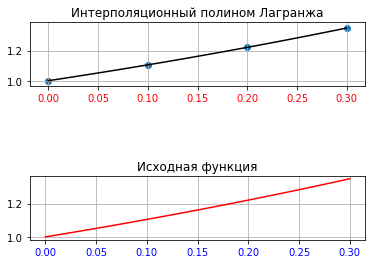

In [65]:
import matplotlib.pyplot as plt

z = [i/100 for i in range(1000) if i/100 >= x1[0] if i/100 <= x1[len(x1)-1]]
w = [function(z[i]) for i in range(len(z))]
x = [i/100 for i in range(1000) if i/100 >= x1[0] if i/100 <= x1[len(x1)-1]]
y = [Lagrange(expValues1, x1, len(x1), x[i]) for i in range(len(x))]

fig = plt.figure()
# Первая область рисования (мультиокно 1)
ax = fig.add_subplot(311)
ax2 = fig.add_subplot(313)
ax.plot(x, y, 'k')
ax2.plot(z, w, 'red')
ax.scatter(x1,expValues1)
xax = ax.xaxis
yax = ax.yaxis
xax2 = ax2.xaxis
yax2 = ax2.yaxis
xlabels = xax.get_ticklabels()
x2labels = xax2.get_ticklabels()
# Линии вспомогательной сетки (главные деления) только по оси абсцисс
xax.grid(True)
yax.grid(True)
xax2.grid(True)
yax2.grid(True)

for label in xlabels:
    # цвет подписи деленений оси OX
    label.set_color('red')
    # поворот подписей деленений оси OX 
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(10)
for label in x2labels:
    # цвет подписи деленений оси OX
    label.set_color('blue')
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(10)

ax.set_title(u'Интерполяционный полином Лагранжа')
ax2.set_title(u'Исходная функция')

#print ('Lines on the axes:', type(line), line)
plt.show()